## Image Classification with CIFAR-10

### Information on CIFAR-10 Dataset
CIFAR-10: https://www.cs.toronto.edu/~kriz/cifar.html
- CIFAR-10 contains 60000 images of 32x32 pixels in 3 channels divided by 10 classes.
- Each class contains 6000 images

### Import the libraries we'll use

In [1]:
# Import the libraries we'll use below.
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

#plots
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

#tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers
from tensorflow.keras.layers import BatchNormalization
from keras import metrics
from keras import utils

!pip install visualkeras
import visualkeras
from tensorflow.keras.utils import plot_model

%matplotlib inline

#Import CIFAR-10, CIFAR-100 Classification
from keras.datasets import cifar10, cifar100

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 kB 24.4 MB/s eta 0:00:00


### Check Runtime Resources





In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Apr 13 19:08:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    45W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


## CIFAR-10: Import & Exploratory Data Analysis

In [4]:
# load training and testing datasets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()  # or cifar100.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [5]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)

print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


In [6]:
# Pixel values range from 0 to 255. To normalize the data, just divide all values by 255.
x_train = x_train / 255
x_test = x_test / 255

# Flatten Y_train and Y_test, so they become vectors of label values.
# The label for X_train[0] is in Y_train[0].
y_train = y_train.flatten()
y_test = y_test.flatten()

label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Apply random shufflying to training examples.
np.random.seed(0)
indices = np.arange(x_train.shape[0])
shuffled_indices = np.random.permutation(indices)
x_train = x_train[shuffled_indices]
y_train = y_train[shuffled_indices]

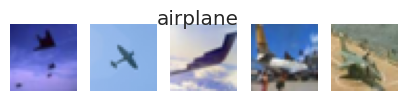

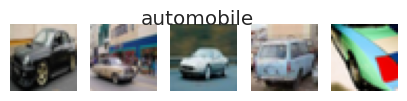

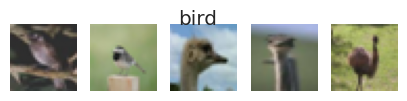

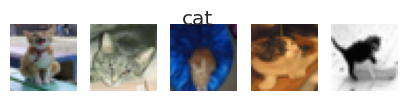

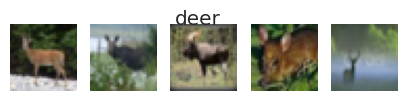

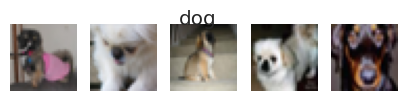

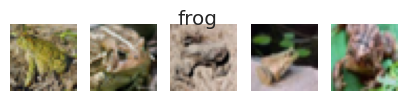

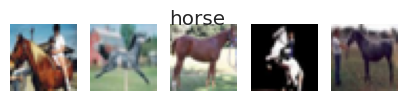

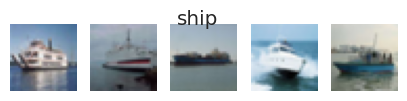

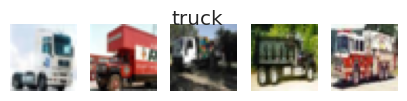

In [7]:
for i in range(len(label_names)):
    # Get the first 5 images of the class
    images = x_train[y_train == i][:5]
    # Plot the images
    fig, axs = plt.subplots(1, 5, figsize=(5,1))
    fig.suptitle(label_names[i])
    for j in range(5):
        axs[j].imshow(images[j])
        axs[j].axis('off')
    # Loop thru printing out plots
    plt.show()

## Train and Test Neural Network Architectures

## Build Feedforward Neural Network Model
Create a placeholder function for building a neural net

In [8]:
def build_model(n_classes,
                hidden_layer_sizes=[],
                activation='relu',
                optimizer='Adam',
                learning_rate=0.1):
  """Build a multi-class logistic regression model using Keras.

  Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.

  Returns:
    model: A tf.keras model (graph).
  """
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  # YOUR CODE HERE
  model = keras.Sequential()
  model.add(keras.layers.Flatten())
  for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(units=hidden_layer_size,
                                    activation = activation)) #use this for hidden layers
  model.add(keras.layers.Dense(
      units=n_classes,
      activation="softmax")) #use "softmax" for active layers
  
  model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [9]:
model = build_model(len(label_names), learning_rate=0.01, hidden_layer_sizes=[1024])

history = model.fit(
  x = x_train,
  y = y_train,
  epochs=20,
  batch_size=64,
  validation_split=0.1,
  verbose=1)

display(pd.DataFrame(history.history))
print(model.summary())

Epoch 1/20
704/704 [==============================] - 8s 3ms/step - loss: 1.9651 - accuracy: 0.3200 - val_loss: 1.8251 - val_accuracy: 0.3444
Epoch 2/20
704/704 [==============================] - 2s 3ms/step - loss: 1.7100 - accuracy: 0.3864 - val_loss: 1.7872 - val_accuracy: 0.3498
Epoch 3/20
704/704 [==============================] - 2s 3ms/step - loss: 1.6297 - accuracy: 0.4194 - val_loss: 1.6434 - val_accuracy: 0.4248
Epoch 4/20
704/704 [==============================] - 2s 3ms/step - loss: 1.5783 - accuracy: 0.4390 - val_loss: 1.5839 - val_accuracy: 0.4450
Epoch 5/20
704/704 [==============================] - 2s 3ms/step - loss: 1.5349 - accuracy: 0.4553 - val_loss: 1.5836 - val_accuracy: 0.4358
Epoch 6/20
704/704 [==============================] - 2s 3ms/step - loss: 1.5098 - accuracy: 0.4648 - val_loss: 1.5774 - val_accuracy: 0.4444
Epoch 7/20
704/704 [==============================] - 2s 3ms/step - loss: 1.4832 - accuracy: 0.4737 - val_loss: 1.5691 - val_accuracy: 0.4488
Epoch 

,loss,accuracy,val_loss,val_accuracy
0,1.965111,0.319956,1.825145,0.3444
1,1.710004,0.386400,1.787167,0.3498
2,1.629734,0.419444,1.643384,0.4248
3,1.578301,0.439022,1.583878,0.4450
4,1.534858,0.455311,1.583611,0.4358
5,1.509801,0.464844,1.577373,0.4444
6,1.483171,0.473711,1.569090,0.4488
7,1.455122,0.483467,1.511428,0.4678
8,1.438895,0.489889,1.568549,0.4526
9,1.421783,0.495067,1.541612,0.4570


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 10)                10250     
                                                                 
Total params: 3,157,002
Trainable params: 3,157,002
Non-trainable params: 0
_________________________________________________________________
None


### Plot FNN Model Training & Validation Accuracy, Evaluate Model Against Test Data

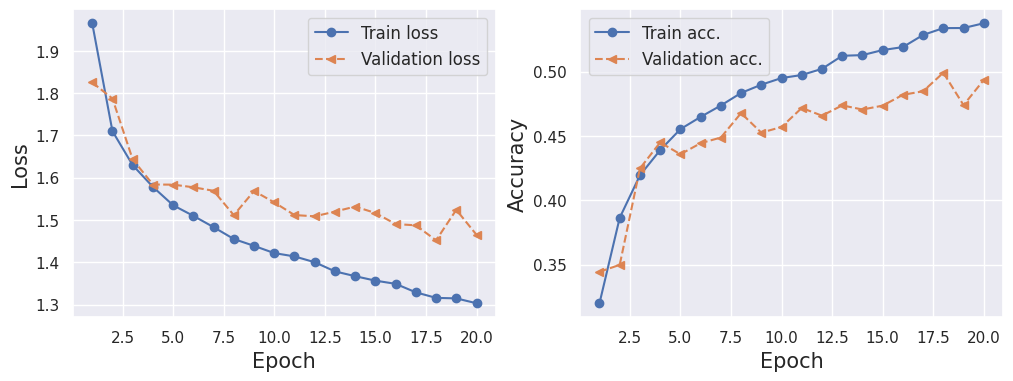

In [10]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [11]:
test_results = model.evaluate(x_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 1.4435 - accuracy: 0.4931

Test Acc. 49.31%


In [12]:
# Get labels by taking the argmax -- the index with the largest probability.
test_predictions = np.argmax(model.predict(x_test), axis=-1)
print(test_predictions)

313/313 [==============================] - 1s 1ms/step
[3 9 8 ... 5 2 4]


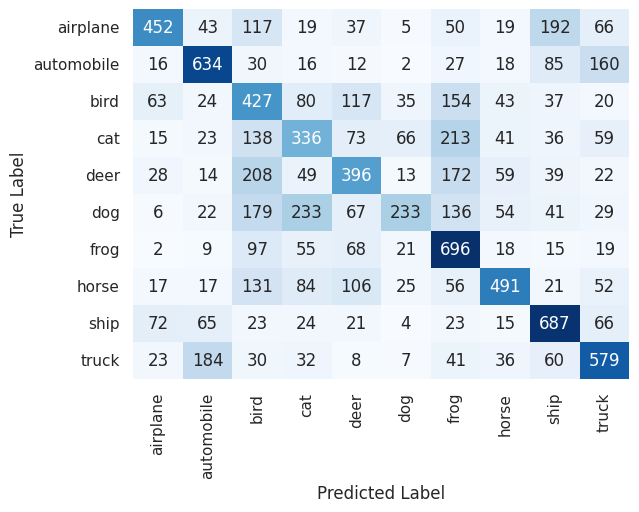

In [13]:
# Create a confusion matrix as a 2D array.
confusion_matrix = tf.math.confusion_matrix(y_test, test_predictions)

# Use a heatmap plot to display it.
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues',
                 xticklabels=label_names, yticklabels=label_names, cbar=False)

# Add axis labels.
ax.set(xlabel='Predicted Label', ylabel='True Label')
plt.show()

## Build CNN Model 1

Differences from FFNN to CNN Model 1
1.   Add two distinct Conv2D and MaxPool2D Layers
2.   Add dropout layer after fully connected dense layer



In [14]:
def build_cnn_model(n_classes,
                hidden_layer_sizes=[1024],
                activation='relu',
                optimizer='Adam',
                learning_rate=0.1):
  """Build a multi-class logistic regression model using Keras.

  Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.

  Returns:
    model: A tf.keras model (graph).
  """
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  model = keras.Sequential()
    
  model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation))
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
    
  model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation))
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
  
  model.add(keras.layers.Flatten())
  for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(units=hidden_layer_size,
                                    activation = activation)) #use this for hidden layers
  
  model.add(tf.keras.layers.Dropout(rate=0.5)) # add dropout layer

  model.add(keras.layers.Dense(
      units=n_classes,
      activation="softmax")) #use "softmax" for active layers
  
  model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [15]:
model = build_cnn_model(len(label_names), learning_rate=0.01, hidden_layer_sizes=[1024])

history = model.fit(
  x = x_train,
  y = y_train,
  epochs=20, #increase training size
  batch_size=64,
  validation_split=0.1,
  verbose=1)

display(pd.DataFrame(history.history))
print(model.summary())

Epoch 1/20
704/704 [==============================] - 9s 4ms/step - loss: 1.5986 - accuracy: 0.4171 - val_loss: 1.3816 - val_accuracy: 0.5036
Epoch 2/20
704/704 [==============================] - 3s 4ms/step - loss: 1.2764 - accuracy: 0.5449 - val_loss: 1.2922 - val_accuracy: 0.5418
Epoch 3/20
704/704 [==============================] - 3s 4ms/step - loss: 1.1329 - accuracy: 0.6004 - val_loss: 1.1607 - val_accuracy: 0.5920
Epoch 4/20
704/704 [==============================] - 3s 4ms/step - loss: 1.0282 - accuracy: 0.6402 - val_loss: 1.0223 - val_accuracy: 0.6384
Epoch 5/20
704/704 [==============================] - 3s 4ms/step - loss: 0.9320 - accuracy: 0.6744 - val_loss: 0.9615 - val_accuracy: 0.6694
Epoch 6/20
704/704 [==============================] - 3s 4ms/step - loss: 0.8632 - accuracy: 0.6951 - val_loss: 0.9554 - val_accuracy: 0.6662
Epoch 7/20
704/704 [==============================] - 3s 4ms/step - loss: 0.8062 - accuracy: 0.7166 - val_loss: 0.9485 - val_accuracy: 0.6784
Epoch 

,loss,accuracy,val_loss,val_accuracy
0,1.598559,0.417111,1.381578,0.5036
1,1.276378,0.544911,1.292246,0.5418
2,1.132925,0.600422,1.160675,0.5920
3,1.028164,0.640200,1.022335,0.6384
4,0.932013,0.674422,0.961465,0.6694
5,0.863202,0.695067,0.955357,0.6662
6,0.806233,0.716578,0.948471,0.6784
7,0.745414,0.734711,0.871427,0.6976
8,0.707649,0.752133,0.897980,0.6954
9,0.650144,0.770111,0.913298,0.6882


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        102464    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 1024)              1

### Plot CNN Model Training & Validation Accuracy, Evaluate Model Against Test Data

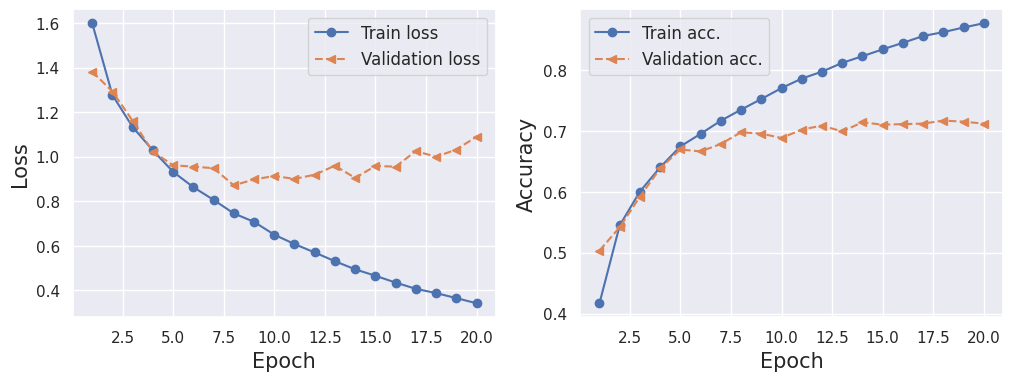

In [16]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [17]:
test_results = model.evaluate(x_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 1.1188 - accuracy: 0.7037

Test Acc. 70.37%


In [18]:
# Get labels by taking the argmax -- the index with the largest probability.
test_predictions = np.argmax(model.predict(x_test), axis=-1)
print(test_predictions)

313/313 [==============================] - 1s 2ms/step
[3 8 8 ... 5 1 7]


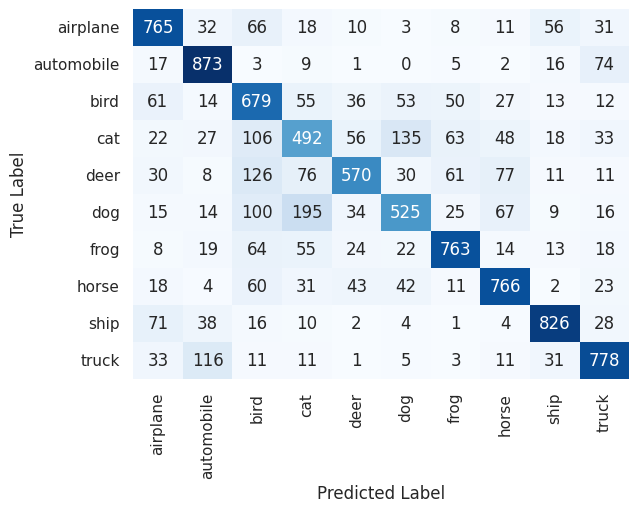

In [19]:
# Create a confusion matrix as a 2D array.
confusion_matrix = tf.math.confusion_matrix(y_test, test_predictions)

# Use a heatmap plot to display it.
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues',
                 xticklabels=label_names, yticklabels=label_names, cbar=False)

# Add axis labels.
ax.set(xlabel='Predicted Label', ylabel='True Label')
plt.show()

### Visualize CNN Model 1 Layers and Plot Structure

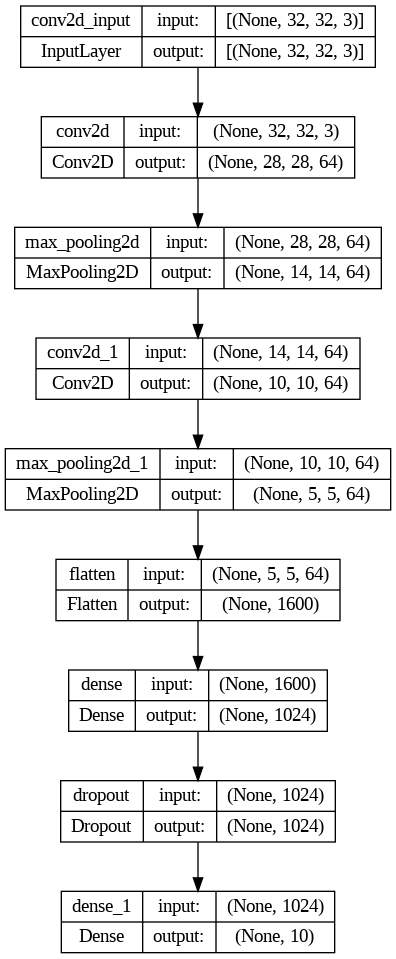

In [20]:
plot_model(model, show_shapes=True, show_layer_names=True)

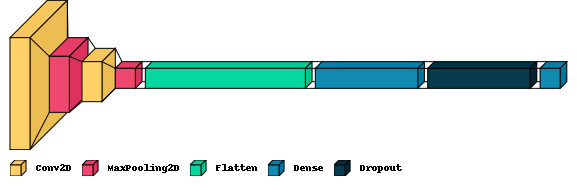

In [21]:
visualkeras.layered_view(model, legend=True)

## Build Deeper CNN Model - CNN Model 2

Differences in CNN Model 2
1.   Add a smaller Conv2D layer so that there are two before our MaxPool layers
2.   Add Dropout layers immediately after both MaxPool2D layers
3.   Double our fully-connected Dense layers

In [22]:
def build_cnn_model_2(n_classes,
                hidden_layer_sizes=[],
                activation='relu',
                optimizer='Adam',
                learning_rate=0.1):
  """Build a multi-class logistic regression model using Keras.

  Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.

  Returns:
    model: A tf.keras model (graph).
  """
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  model = keras.Sequential()
  #double-up on convolutions and add dropouts for each layer
  model.add(keras.layers.Conv2D(filters = 32, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))  
  model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
  model.add(tf.keras.layers.Dropout(rate=0.5)) # add dropout layer

  model.add(keras.layers.Conv2D(filters = 32, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))    
  model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
  model.add(tf.keras.layers.Dropout(rate=0.5)) # add dropout layer

  model.add(keras.layers.Flatten())
  for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(units=hidden_layer_size,
                                    activation = activation)) #use this for hidden layers
  
  model.add(tf.keras.layers.Dropout(rate=0.5)) # add dropout layer

  model.add(keras.layers.Dense(
      units=n_classes,
      activation="softmax")) #use "softmax" for active layers
  
  model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [23]:
model = build_cnn_model_2(len(label_names), learning_rate=0.01, hidden_layer_sizes=[1024, 1024])

history = model.fit(
  x = x_train,
  y = y_train,
  epochs=20, 
  batch_size=64,
  validation_split=0.1,
  verbose=1)

display(pd.DataFrame(history.history))
print(model.summary())

Epoch 1/20
704/704 [==============================] - 7s 6ms/step - loss: 1.7042 - accuracy: 0.3702 - val_loss: 1.4934 - val_accuracy: 0.4798
Epoch 2/20
704/704 [==============================] - 3s 5ms/step - loss: 1.3264 - accuracy: 0.5194 - val_loss: 1.1911 - val_accuracy: 0.5740
Epoch 3/20
704/704 [==============================] - 3s 5ms/step - loss: 1.1534 - accuracy: 0.5894 - val_loss: 1.0788 - val_accuracy: 0.6154
Epoch 4/20
704/704 [==============================] - 3s 5ms/step - loss: 1.0490 - accuracy: 0.6307 - val_loss: 0.9683 - val_accuracy: 0.6602
Epoch 5/20
704/704 [==============================] - 3s 5ms/step - loss: 0.9515 - accuracy: 0.6655 - val_loss: 0.8899 - val_accuracy: 0.6838
Epoch 6/20
704/704 [==============================] - 3s 5ms/step - loss: 0.8776 - accuracy: 0.6895 - val_loss: 0.9012 - val_accuracy: 0.6894
Epoch 7/20
704/704 [==============================] - 3s 5ms/step - loss: 0.8189 - accuracy: 0.7135 - val_loss: 0.8486 - val_accuracy: 0.7102
Epoch 

,loss,accuracy,val_loss,val_accuracy
0,1.704232,0.370244,1.493424,0.4798
1,1.326415,0.519400,1.191100,0.5740
2,1.153384,0.589378,1.078801,0.6154
3,1.049003,0.630667,0.968290,0.6602
4,0.951499,0.665533,0.889878,0.6838
5,0.877587,0.689511,0.901153,0.6894
6,0.818892,0.713511,0.848634,0.7102
7,0.767605,0.728756,0.823278,0.7200
8,0.714503,0.749444,0.828868,0.7156
9,0.685225,0.759333,0.833945,0.7114


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        51264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        51232     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        51264     
                                                        

### Plot CNN Model 2 Training & Validation Accuracy, Evaluate Model Against Test Data

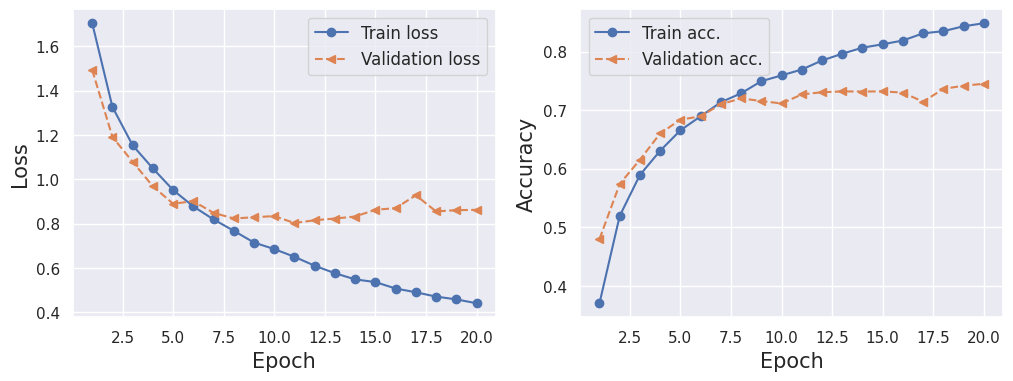

In [24]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [25]:
test_results = model.evaluate(x_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.8900 - accuracy: 0.7339

Test Acc. 73.39%


In [26]:
# Get labels by taking the argmax -- the index with the largest probability.
test_predictions = np.argmax(model.predict(x_test), axis=-1)
print(test_predictions)

313/313 [==============================] - 1s 2ms/step
[5 8 8 ... 5 4 7]


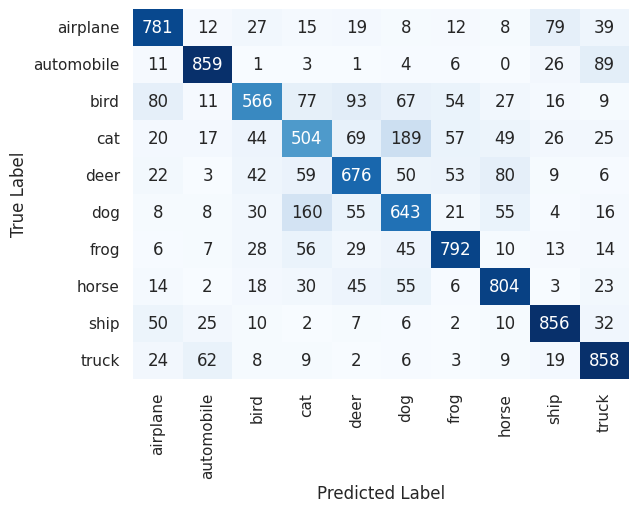

In [27]:
# Create a confusion matrix as a 2D array.
confusion_matrix = tf.math.confusion_matrix(y_test, test_predictions)

# Use a heatmap plot to display it.
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues',
                 xticklabels=label_names, yticklabels=label_names, cbar=False)

# Add axis labels.
ax.set(xlabel='Predicted Label', ylabel='True Label')
plt.show()

### Visualize CNN Model 2 Layers and Plot Structure

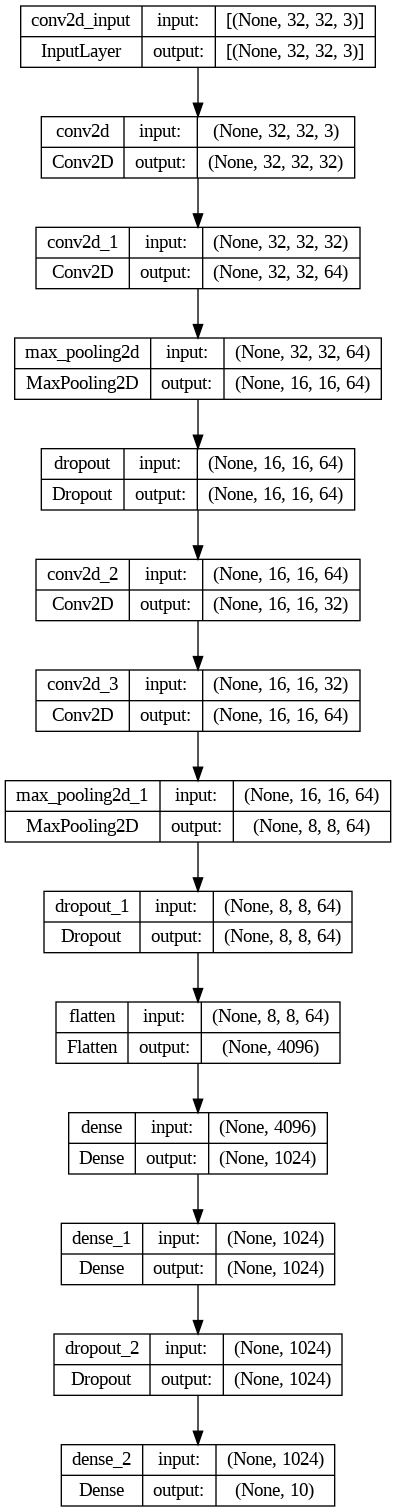

In [28]:
plot_model(model, show_shapes=True, show_layer_names=True)

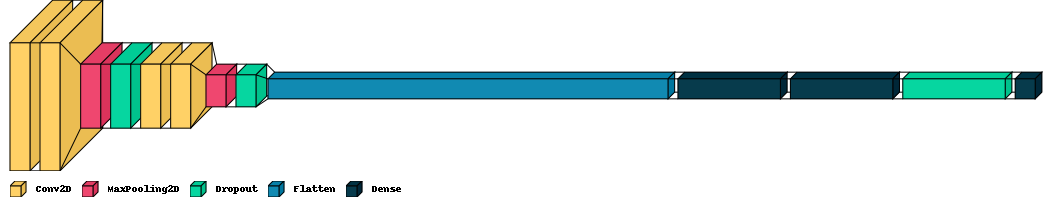

In [29]:
visualkeras.layered_view(model, legend=True)

## Build Even Deeper CNN Model - CNN Model 3 With Batch Normalization

Differences in CNN Model 3:
1. Increase density of Conv2D layers 
2. Add BatchNormalizatoin after each Conv2D layer
3. Add another Layer of Conv2D + MaxPooling + BatchNormalization
3. Increase Training Time to 20 epochs

In [30]:
def build_cnn_model_3(n_classes,
                hidden_layer_sizes=[],
                activation='relu',
                optimizer='Adam',
                learning_rate=0.1):
  """Build a multi-class logistic regression model using Keras.

  Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.

  Returns:
    model: A tf.keras model (graph).
  """
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  model = keras.Sequential()

  model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(BatchNormalization())  
  model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(BatchNormalization())
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
  model.add(tf.keras.layers.Dropout(rate=0.4)) # adjust dropout layer

  model.add(keras.layers.Conv2D(filters = 128, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(BatchNormalization())  
  model.add(keras.layers.Conv2D(filters = 128, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(BatchNormalization())
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
  model.add(tf.keras.layers.Dropout(rate=0.4)) # adjust dropout layer

  model.add(keras.layers.Conv2D(filters = 256, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(BatchNormalization())  
  model.add(keras.layers.Conv2D(filters = 256, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(BatchNormalization())
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
  model.add(tf.keras.layers.Dropout(rate=0.4)) # adjust dropout layer

  model.add(keras.layers.Flatten())
  for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(units=hidden_layer_size,
                                    activation = activation)) #use this for hidden layers
  
  model.add(tf.keras.layers.Dropout(rate=0.5)) # add dropout layer

  model.add(keras.layers.Dense(
      units=n_classes,
      activation="softmax")) #use "softmax" for active layers
  
  model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [31]:
model = build_cnn_model_3(len(label_names), learning_rate=0.01, hidden_layer_sizes=[1024, 1024])

history = model.fit(
  x = x_train,
  y = y_train,
  epochs=20, #can we train a bit longer
  batch_size=64,
  validation_split=0.1,
  verbose=1)

display(pd.DataFrame(history.history))
print(model.summary())

Epoch 1/20
704/704 [==============================] - 13s 9ms/step - loss: 1.6357 - accuracy: 0.4297 - val_loss: 1.9292 - val_accuracy: 0.3724
Epoch 2/20
704/704 [==============================] - 6s 8ms/step - loss: 1.1078 - accuracy: 0.6113 - val_loss: 1.1116 - val_accuracy: 0.6184
Epoch 3/20
704/704 [==============================] - 6s 8ms/step - loss: 0.8941 - accuracy: 0.6943 - val_loss: 0.8365 - val_accuracy: 0.7128
Epoch 4/20
704/704 [==============================] - 6s 8ms/step - loss: 0.7561 - accuracy: 0.7452 - val_loss: 0.9105 - val_accuracy: 0.6964
Epoch 5/20
704/704 [==============================] - 6s 8ms/step - loss: 0.6705 - accuracy: 0.7753 - val_loss: 0.7757 - val_accuracy: 0.7408
Epoch 6/20
704/704 [==============================] - 6s 8ms/step - loss: 0.6033 - accuracy: 0.7976 - val_loss: 0.7352 - val_accuracy: 0.7630
Epoch 7/20
704/704 [==============================] - 6s 8ms/step - loss: 0.5320 - accuracy: 0.8215 - val_loss: 1.0517 - val_accuracy: 0.6892
Epoch

,loss,accuracy,val_loss,val_accuracy
0,1.635654,0.429667,1.929206,0.3724
1,1.107752,0.611333,1.111618,0.6184
2,0.894120,0.694311,0.836542,0.7128
3,0.756133,0.745200,0.910474,0.6964
4,0.670464,0.775289,0.775746,0.7408
5,0.603262,0.797578,0.735230,0.7630
6,0.532021,0.821511,1.051704,0.6892
7,0.482911,0.838711,0.667850,0.7894
8,0.430155,0.856178,0.713737,0.7754
9,0.386573,0.870956,0.669238,0.8024


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        4864      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        102464    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                        

### Plot CNN Model 3 Training & Validation Accuracy, Evaluate Model Against Test Data

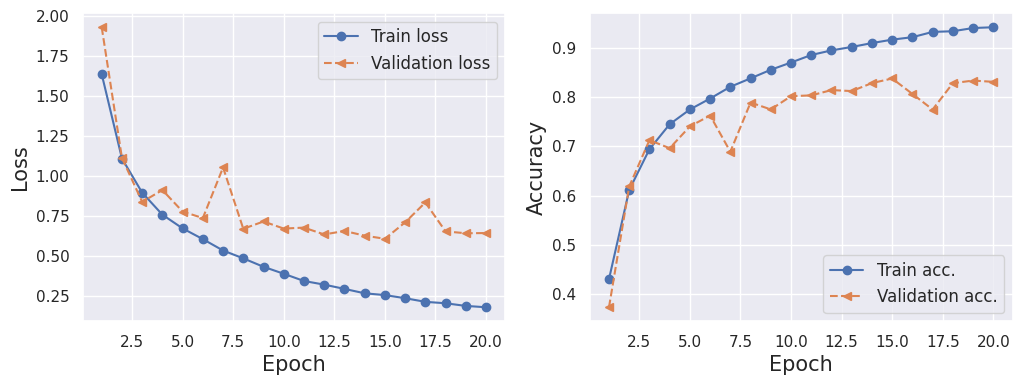

In [32]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [33]:
test_results = model.evaluate(x_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.7164 - accuracy: 0.8284

Test Acc. 82.84%


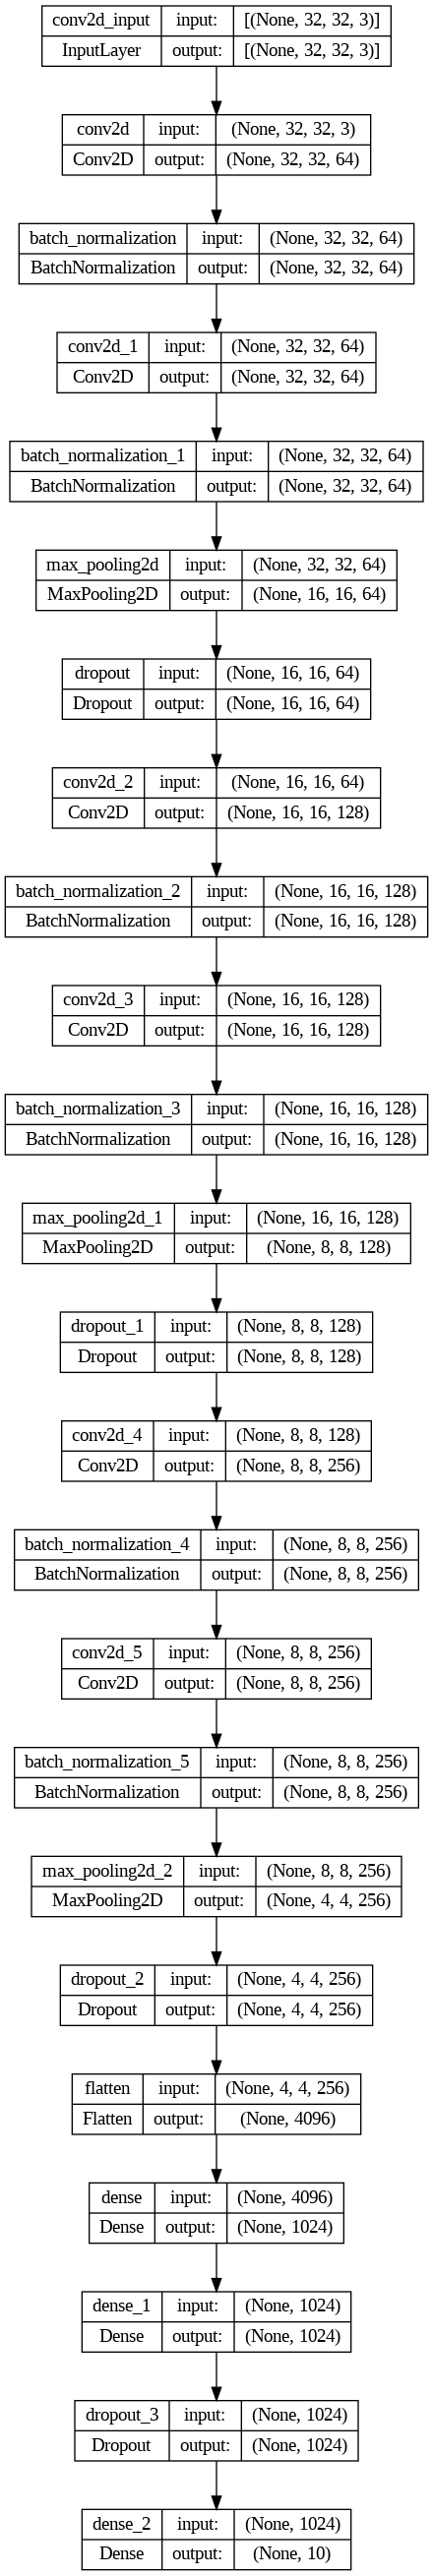

In [34]:
plot_model(model, show_shapes=True, show_layer_names=True)

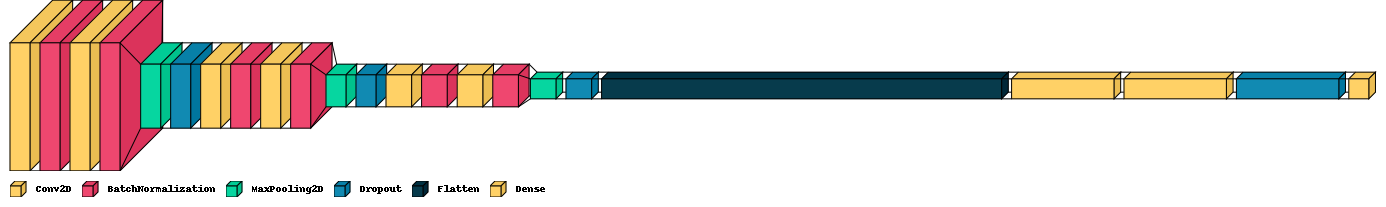

In [35]:
visualkeras.layered_view(model, legend=True)

### Evaluate CNN Model Precision and Accuracy Metrics by Label

In [36]:
# Get labels by taking the argmax -- the index with the largest probability.
test_predictions = np.argmax(model.predict(x_test), axis=-1)
print(test_predictions)

313/313 [==============================] - 1s 2ms/step
[3 8 8 ... 5 1 7]


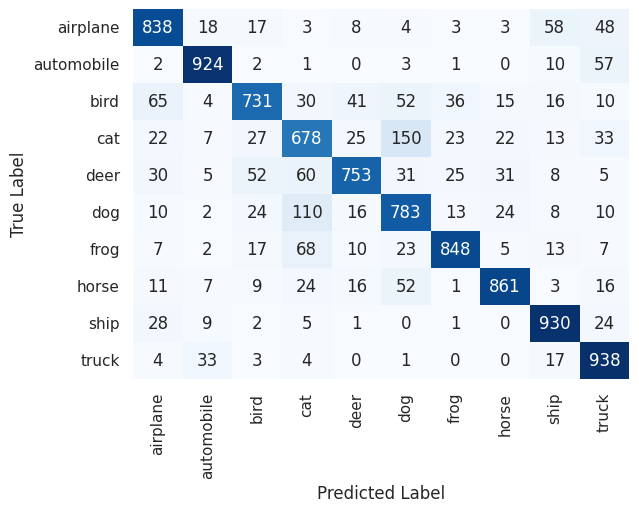

In [37]:
# Create a confusion matrix as a 2D array.
confusion_matrix = tf.math.confusion_matrix(y_test, test_predictions)

# Use a heatmap plot to display it.
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues',
                 xticklabels=label_names, yticklabels=label_names, cbar=False)

# Add axis labels.
ax.set(xlabel='Predicted Label', ylabel='True Label')
plt.show()

In [38]:
# Calculate Precision: TP / (TP+FP) ~ divide the true positives for each label by the sum down the columns (axis=0) 
for i in range(10):
    print(label_names[i], "\t", confusion_matrix[(i,i)]/tf.reduce_sum(confusion_matrix,0)[i])

airplane 	 tf.Tensor(0.823992133726647, shape=(), dtype=float64)
automobile 	 tf.Tensor(0.913946587537092, shape=(), dtype=float64)
bird 	 tf.Tensor(0.8269230769230769, shape=(), dtype=float64)
cat 	 tf.Tensor(0.6897253306205493, shape=(), dtype=float64)
deer 	 tf.Tensor(0.8655172413793103, shape=(), dtype=float64)
dog 	 tf.Tensor(0.7124658780709736, shape=(), dtype=float64)
frog 	 tf.Tensor(0.8916929547844374, shape=(), dtype=float64)
horse 	 tf.Tensor(0.8959417273673257, shape=(), dtype=float64)
ship 	 tf.Tensor(0.8643122676579925, shape=(), dtype=float64)
truck 	 tf.Tensor(0.8170731707317073, shape=(), dtype=float64)


label names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] 



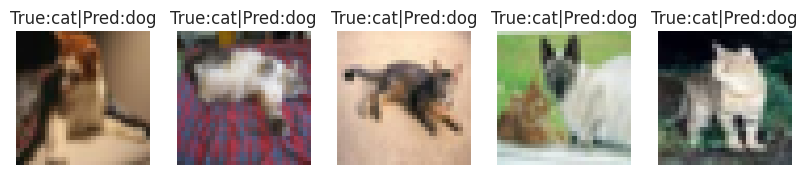

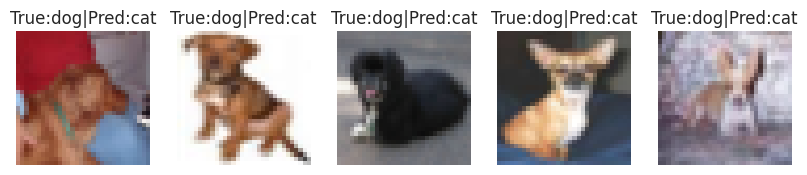

In [39]:
print("label names:", label_names,"\n")
x_test_1 = x_test[np.logical_and(y_test==3, test_predictions==5)] #true label = 'cat', predicted label = 'dog'
x_test_2 = x_test[np.logical_and(y_test==5, test_predictions==3)] #true label = 'cat', predicted label = 'frog'

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(10,5))
for i in range(5):
  axs[i].imshow(x_test_1[i], cmap='gray')
  axs[i].set_title("True:" + label_names[3] + "|Pred:" + label_names[5])
  axs[i].axis('off')
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(10,5))
for i in range(5):
  axs[i].imshow(x_test_2[i], cmap='gray')
  axs[i].set_title("True:" + label_names[5] + "|Pred:" + label_names[3])
  axs[i].axis('off')
plt.show()

## NOT RUNNING BELOW: Incorporate Pre-Processing Data and Run on Our Best Model

170498071/170498071 [==============================] - 4s 0us/step
x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


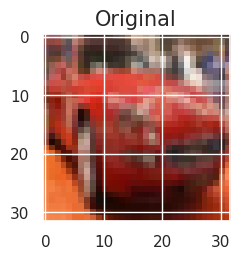

In [ ]:
# # load training and testing datasets
# (X_train, Y_train), (X_test, Y_test) = cifar10.load_data()  # or cifar100.load_data()

# print("x_train shape: ", X_train.shape)
# print("y_train shape: ", Y_train.shape)
# print("x_test shape: ", X_test.shape)
# print("y_test shape: ", Y_test.shape)

# # covert to RGB
# X_train = X_train/255.0
# X_test = X_test/255.0

# # plot original
# fig = plt.figure(figsize=(14, 12))
# ax = fig.add_subplot(1, 5, 1)
# ax.imshow(X_train[5])
# ax.set_title('Original', size=15);

# plt.show()

### Resize 32x32 Images to 64x64

x_train shape:  (50000, 64, 64, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 64, 64, 3)
y_test shape:  (10000, 1)


TypeError: ignored

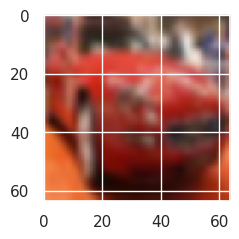

In [ ]:
# IMAGE_SIZE = (64,64)
# X_train = tf.image.resize(X_train, size=IMAGE_SIZE)
# X_test = tf.image.resize(X_test, size=IMAGE_SIZE)
# print("x_train shape: ", X_train.shape)
# print("y_train shape: ", Y_train.shape)
# print("x_test shape: ", X_test.shape)
# print("y_test shape: ", Y_test.shape)

# #image = X_train[5]

# # plot resized image
# fig = plt.figure(figsize=(14, 12))
# ax = fig.add_subplot(1, 5, 1)
# ax.imshow(ax.imshow(X_train[5]))
# ax.set_title('Resized to 64 x 64', size=15);
# plt.show()


### Add CONTRAST & BRIGHTNESS & RANDOM IMAGE FLIP to images

In [ ]:
# # COMMENTED OUT CODE BLOCK TO RUN OUR MODELS
# CONTRAST_FACTOR = 2
# DELTA = 0.3
# # adjust brightness
# x_train_augm = tf.image.adjust_brightness(X_train, delta=DELTA)

# # adjust contrast
# x_train_augm = tf.image.adjust_contrast(x_train_augm, contrast_factor=CONTRAST_FACTOR)

# #add random flip
# x_train_augm = tf.image.random_flip_left_right(x_train_augm)

# # plot adjusted image
# fig = plt.figure(figsize=(14, 12))
# ax = fig.add_subplot(1, 5, 1)
# ax.imshow(ax.imshow(x_train_augm[5]))
# ax.set_title('Adjust Brightness & Color', size=15);
# plt.show()

ResourceExhaustedError: ignored

### Concatenate Original Training data with Augmented Training Data & Shuffle

In [ ]:
#  # concatenate original X_train and augmented X_train data
# X_train = tf.concat([X_train, x_train_augm],axis=0)

# # concatenate y_train (note the label is preserved)
# Y_train_augm = y_train
# Y_train = tf.concat([y_train, y_train_augm],axis=0)

In [ ]:
# # shuffle X_train and y_train, i.e., shuffle two tensors in the same order
# shuffle = tf.random.shuffle(tf.range(tf.shape(X_train)[0], dtype=tf.int32))
# X_train = tf.gather(X_train, shuffle)
# Y_train = tf.gather(Y_train, shuffle).numpy() #also transforms y_train to numpy array

# ###NOTE: FINAL TRAINING DATA SET IS STORED IN VARIABLE X_train

# print("X_train shape: ", X_train.shape)
# print("Y_train shape: ", Y_train.shape)

ResourceExhaustedError: ignored

### Run CNN Model 3 on Augmented Training Set

In [ ]:
# model = build_cnn_model_3(len(label_names), learning_rate=0.01, hidden_layer_sizes=[1024, 1024])

# history = model.fit(
#   x = X_train,
#   y = Y_train,
#   epochs=20, #can we train a bit longer
#   batch_size=64,
#   validation_split=0.1,
#   verbose=1)

# display(pd.DataFrame(history.history))
# print(model.summary())

## Explore Transfer Learning

### Build ResNet50 And Train Model

In [40]:
#load ResNet50 Pre-Trained Model
from tensorflow.keras.applications.resnet50 import ResNet50

# load training and testing datasets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()  # or cifar100.load_data()

In [41]:
def preprocess_image_input(input):
  input = input.astype('float32')
  output = tf.keras.applications.resnet50.preprocess_input(input)
  return output

In [42]:
#convert inputs to float32
x_train = preprocess_image_input(x_train)
x_test = preprocess_image_input(x_test)

# Pixel values range from 0 to 255. To normalize the data, just divide all values by 255.
x_train = x_train / 255
x_test = x_test / 255

print(f"x_train shape {x_train.shape}")
print(f"x_test shape {x_test.shape}")

# Apply random shufflying to training examples.
np.random.seed(0)
indices = np.arange(x_train.shape[0])
shuffled_indices = np.random.permutation(indices)
x_train = x_train[shuffled_indices]
y_train = y_train[shuffled_indices]

x_train shape (50000, 32, 32, 3)
x_test shape (10000, 32, 32, 3)


In [43]:
'''
Feature Extraction is performed by ResNet50 pretrained on imagenet weights. 
Input size is 224 x 224.
'''
def feature_extractor(inputs):

  feature_extractor = tf.keras.applications.resnet.ResNet50(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')(inputs)
  return feature_extractor


'''
Defines final dense layers and subsequent softmax layer for classification.
'''
def classifier(inputs):
    x = tf.keras.layers.GlobalAveragePooling2D()(inputs)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(1024, activation="relu")(x)
    x = tf.keras.layers.Dropout(0.4)(x)
    x = tf.keras.layers.Dense(1024, activation="relu")(x)
    x = tf.keras.layers.Dropout(0.4)(x)
    x = tf.keras.layers.Dense(10, activation="softmax", name="classification")(x)
    return x

'''
Since input image size is (32 x 32), first upsample the image by factor of (7x7) to transform it to (224 x 224)
Connect the feature extraction and "classifier" layers to build the model.
'''
def final_model(inputs):

    resize = tf.keras.layers.UpSampling2D(size=(7,7))(inputs)

    resnet_feature_extractor = feature_extractor(resize)
    classification_output = classifier(resnet_feature_extractor)

    return classification_output

'''
Define the model and compile it. 
Use Adam as the optimizer.
Use Sparse Categorical CrossEntropy as the loss function.
'''
def define_compile_model():
  inputs = tf.keras.layers.Input(shape=(32,32,3))
  
  classification_output = final_model(inputs) 
  model = tf.keras.Model(inputs=inputs, outputs = classification_output)
 
  model.compile(optimizer='Adam', 
                loss='sparse_categorical_crossentropy',
                metrics = ['accuracy'])
  
  return model


model = define_compile_model()

model.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                              

In [44]:
history = model.fit(
  x = x_train, 
  y = y_train,
  epochs=20, 
  batch_size=64,
  validation_split=0.1,
  verbose=1)

display(pd.DataFrame(history.history))
print(model.summary())

Epoch 1/20
704/704 [==============================] - 112s 102ms/step - loss: 0.9629 - accuracy: 0.6714 - val_loss: 2.8278 - val_accuracy: 0.1898
Epoch 2/20
704/704 [==============================] - 69s 98ms/step - loss: 0.5339 - accuracy: 0.8227 - val_loss: 0.5620 - val_accuracy: 0.8186
Epoch 3/20
704/704 [==============================] - 69s 98ms/step - loss: 0.4046 - accuracy: 0.8672 - val_loss: 0.5049 - val_accuracy: 0.8338
Epoch 4/20
704/704 [==============================] - 69s 98ms/step - loss: 0.3136 - accuracy: 0.8959 - val_loss: 0.5958 - val_accuracy: 0.8186
Epoch 5/20
704/704 [==============================] - 69s 98ms/step - loss: 0.2578 - accuracy: 0.9147 - val_loss: 0.4656 - val_accuracy: 0.8510
Epoch 6/20
704/704 [==============================] - 69s 98ms/step - loss: 0.2049 - accuracy: 0.9318 - val_loss: 0.4563 - val_accuracy: 0.8564
Epoch 7/20
704/704 [==============================] - 69s 98ms/step - loss: 0.1705 - accuracy: 0.9438 - val_loss: 0.5039 - val_accurac

,loss,accuracy,val_loss,val_accuracy
0,0.962863,0.671356,2.827792,0.1898
1,0.533925,0.822733,0.562014,0.8186
2,0.404576,0.867244,0.504873,0.8338
3,0.313564,0.895889,0.595849,0.8186
4,0.257782,0.914711,0.465644,0.8510
5,0.204867,0.931800,0.456350,0.8564
6,0.170537,0.943756,0.503853,0.8460
7,0.147357,0.952111,0.492985,0.8556
8,0.118120,0.962244,0.538142,0.8552
9,0.103159,0.966689,0.521184,0.8692


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              209817

### Plot ResNet50 Training & Validation Accuracy, Evaluate Model Against Test Data

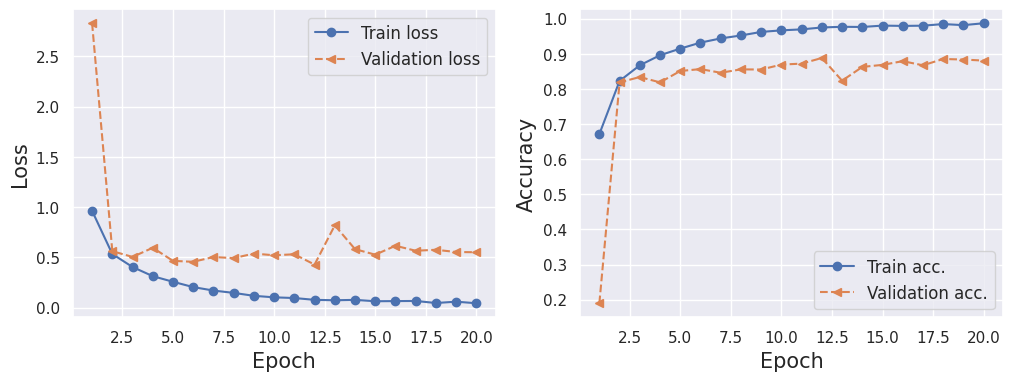

In [45]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [47]:
test_results = model.evaluate(x_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

313/313 [==============================] - 5s 16ms/step - loss: 0.5561 - accuracy: 0.8788

Test Acc. 87.88%


### Evaluate ResNet50 Model Precision and Accuracy Metrics by Label

In [49]:
# Get labels by taking the argmax -- the index with the largest probability.
test_predictions = np.argmax(model.predict(x_test), axis=-1)
print(test_predictions)

313/313 [==============================] - 5s 13ms/step
[3 8 8 ... 5 1 7]


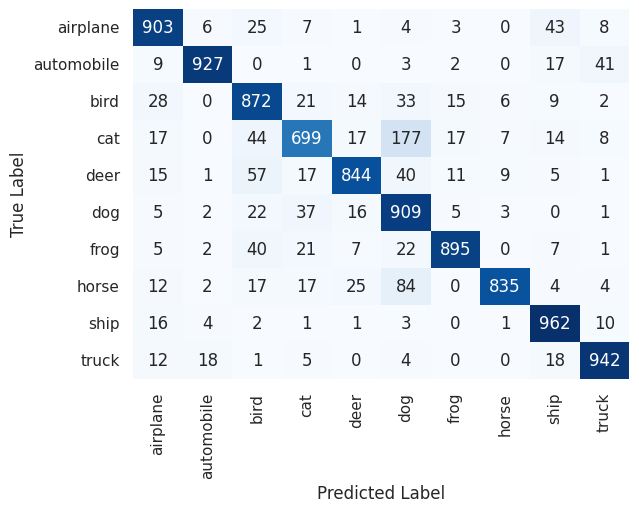

In [50]:
# Create a confusion matrix as a 2D array.
confusion_matrix = tf.math.confusion_matrix(y_test, test_predictions)

# Use a heatmap plot to display it.
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues',
                 xticklabels=label_names, yticklabels=label_names, cbar=False)

# Add axis labels.
ax.set(xlabel='Predicted Label', ylabel='True Label')
plt.show()

In [51]:
# Calculate Precision: TP / (TP+FP) ~ divide the true positives for each label by the sum down the columns (axis=0) 
for i in range(10):
    print(label_names[i], "\t", confusion_matrix[(i,i)]/tf.reduce_sum(confusion_matrix,0)[i])

airplane 	 tf.Tensor(0.8835616438356164, shape=(), dtype=float64)
automobile 	 tf.Tensor(0.9636174636174636, shape=(), dtype=float64)
bird 	 tf.Tensor(0.8074074074074075, shape=(), dtype=float64)
cat 	 tf.Tensor(0.8462469733656174, shape=(), dtype=float64)
deer 	 tf.Tensor(0.9124324324324324, shape=(), dtype=float64)
dog 	 tf.Tensor(0.7107114933541829, shape=(), dtype=float64)
frog 	 tf.Tensor(0.9440928270042194, shape=(), dtype=float64)
horse 	 tf.Tensor(0.9698025551684089, shape=(), dtype=float64)
ship 	 tf.Tensor(0.891566265060241, shape=(), dtype=float64)
truck 	 tf.Tensor(0.925343811394892, shape=(), dtype=float64)


### Build VGG16 and Train Model

In [52]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from keras.utils.np_utils import to_categorical

In [53]:
# Initialize our vgg16 pre-trained model with imagenet weights
vgg16_model = VGG16(weights='imagenet',
                    include_top=False, 
                    classes=10,
                    input_shape=(32,32,3)# input: 32x32 images with 3 channels -> (32, 32, 3) tensors.
                   )

#Define the sequential model and add th VGG's layers to it
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

# Adding hidden and output layer to our model

from tensorflow.keras.layers import Dense, Flatten, Dropout
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0         
                                                       

In [54]:
# load training and testing datasets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()  # or cifar100.load_data()

# Convert class vectors to binary class matrices using one hot encoding
y_train_ohe = to_categorical(y_train, num_classes = 10)
y_test_ohe = to_categorical(y_test, num_classes = 10)

# Data normalization
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

print(x_train.shape)
print(y_train_ohe.shape)
print(x_test.shape)
print(y_test_ohe.shape)

# Build validation datasets
x_val = x_train[40000:]
y_val = y_train_ohe[40000:]
print(f"x_val shape {x_val.shape}")
print(f"y_val shape {y_val.shape}")

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)
x_val shape (10000, 32, 32, 3)
y_val shape (10000, 10)


In [55]:
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import LearningRateScheduler

#------------------------------------------------------------------------------
# TRAINING THE CNN ON THE TRAIN/VALIDATION DATA
#------------------------------------------------------------------------------

# initiate SGD optimizer
sgd = optimizers.SGD(learning_rate=0.001, momentum=0.9)

# For a multi-class classification problem
model.compile(loss='categorical_crossentropy',optimizer= sgd,metrics=['accuracy'])

def lr_scheduler(epoch):
    return 0.001 * (0.5 ** (epoch // 20))
reduce_lr = LearningRateScheduler(lr_scheduler)

#mc = ModelCheckpoint('./weights.h5', monitor='val_accuracy', save_best_only=True, mode='max')

# initialize the number of epochs and batch size
EPOCHS = 20
BS = 128

# construct the training image generator for data augmentation
aug = ImageDataGenerator(
    rotation_range=20, 
    zoom_range=0.15, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.15,
    horizontal_flip=True, 
    fill_mode="nearest")
 
# train the model
history = model.fit(
    aug.flow(x_train,y_train_ohe, batch_size=BS),
    validation_data=(x_val,y_val),
    #steps_per_epoch=len(x_train) // BS,
    epochs=EPOCHS#,
    #callbacks=reduce_lr
    )

#We load the best weights saved by the ModelCheckpoint
#model.load_weights('./weights.h5')

#show output of model
display(pd.DataFrame(history.history))
print(model.summary())


Epoch 1/20
391/391 [==============================] - 32s 72ms/step - loss: 1.6032 - accuracy: 0.4210 - val_loss: 0.9217 - val_accuracy: 0.6743
Epoch 2/20
391/391 [==============================] - 27s 70ms/step - loss: 1.0397 - accuracy: 0.6394 - val_loss: 0.7590 - val_accuracy: 0.7368
Epoch 3/20
391/391 [==============================] - 27s 69ms/step - loss: 0.8789 - accuracy: 0.6979 - val_loss: 0.6598 - val_accuracy: 0.7745
Epoch 4/20
391/391 [==============================] - 27s 69ms/step - loss: 0.7939 - accuracy: 0.7302 - val_loss: 0.5765 - val_accuracy: 0.7998
Epoch 5/20
391/391 [==============================] - 27s 69ms/step - loss: 0.7233 - accuracy: 0.7522 - val_loss: 0.5489 - val_accuracy: 0.8105
Epoch 6/20
391/391 [==============================] - 27s 69ms/step - loss: 0.6742 - accuracy: 0.7687 - val_loss: 0.6029 - val_accuracy: 0.7967
Epoch 7/20
391/391 [==============================] - 27s 69ms/step - loss: 0.6456 - accuracy: 0.7790 - val_loss: 0.4911 - val_accuracy:

,loss,accuracy,val_loss,val_accuracy
0,1.603234,0.42102,0.921678,0.6743
1,1.039669,0.63944,0.759011,0.7368
2,0.878897,0.69788,0.659802,0.7745
3,0.793943,0.73018,0.576461,0.7998
4,0.723270,0.75222,0.548934,0.8105
5,0.674167,0.76866,0.602902,0.7967
6,0.645567,0.77902,0.491144,0.8311
7,0.615537,0.78946,0.457139,0.8406
8,0.588501,0.79918,0.410842,0.8573
9,0.564701,0.80804,0.444152,0.8482


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0         
                                                                 
 block3_conv1 (Conv2D)       (None, 8, 8, 256)        

### Plot VGG16 Training & Validation Accuracy, Evaluate VGG16 vs Test Data

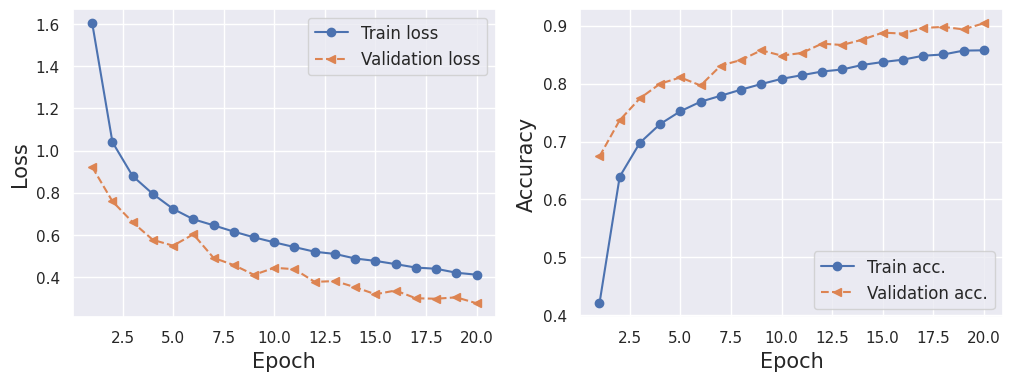

In [56]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [ ]:
test_results = model.evaluate(x_test, y_test_ohe)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.4079 - accuracy: 0.8618

Test Acc. 86.18%


### Evaluate VGG16 Model Precision & Accuracy by Label

In [57]:
# Get labels by taking the argmax -- the index with the largest probability.
test_predictions = np.argmax(model.predict(x_test), axis=-1)
print(test_predictions)

313/313 [==============================] - 1s 3ms/step
[3 8 8 ... 5 1 7]


In [58]:
print(test_predictions.shape)

(10000,)


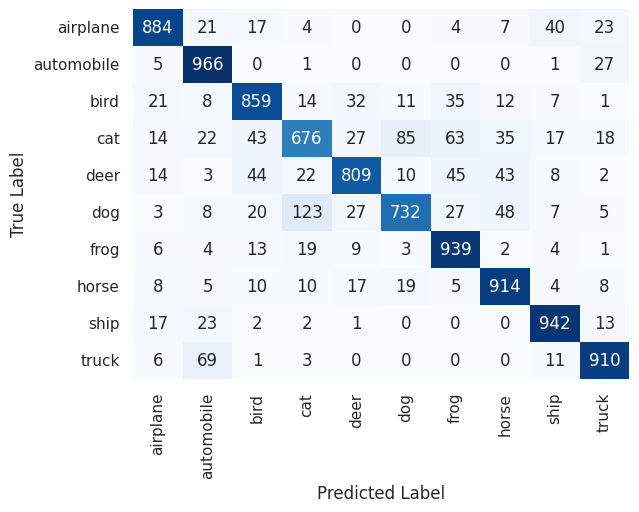

In [60]:
# Create a confusion matrix as a 2D array.
confusion_matrix = tf.math.confusion_matrix(y_test, test_predictions)

# Use a heatmap plot to display it.
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues',
                 xticklabels=label_names, yticklabels=label_names, cbar=False)

# Add axis labels.
ax.set(xlabel='Predicted Label', ylabel='True Label')
plt.show()

In [61]:
# Calculate Precision: TP / (TP+FP) ~ divide the true positives for each label by the sum down the columns (axis=0) 
for i in range(10):
    print(label_names[i], "\t", confusion_matrix[(i,i)]/tf.reduce_sum(confusion_matrix,0)[i])

airplane 	 tf.Tensor(0.9038854805725971, shape=(), dtype=float64)
automobile 	 tf.Tensor(0.8556244464127547, shape=(), dtype=float64)
bird 	 tf.Tensor(0.8513379583746283, shape=(), dtype=float64)
cat 	 tf.Tensor(0.7734553775743707, shape=(), dtype=float64)
deer 	 tf.Tensor(0.8774403470715835, shape=(), dtype=float64)
dog 	 tf.Tensor(0.8511627906976744, shape=(), dtype=float64)
frog 	 tf.Tensor(0.8398926654740608, shape=(), dtype=float64)
horse 	 tf.Tensor(0.8614514608859567, shape=(), dtype=float64)
ship 	 tf.Tensor(0.9048991354466859, shape=(), dtype=float64)
truck 	 tf.Tensor(0.9027777777777778, shape=(), dtype=float64)


## Conclusions and Results

MODEL | TRAINING ACCURACY | VALIDATION ACCURACY | TEST ACCURACY | HIDDEN LAYERS | ACIVATION | OPTIMIZER | #PARAMETERS | PROCESSING TIME
:-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-:
FFNN | .5377 | .4936 | .4931 | [1024] | relu | Adam | 3,157,002 | 0:40
CNN1 | .8765 | .7118 | .7037 | [1024] | relu | Adam | 1,757,002 | 1:00
CNN2 | .8484 | .7450 | .7339 | [1024, 1024] | relu | Adam | 5,411,370 | 1:00
CNN3 | .9428 | .8316 | .8284 | [1024, 1024] | relu | Adam | 8,438,858 | 1:20
VGG16 | .8573 | .9040 | .8618 | [1024] | relu | Adam | 16,299,850 | 9:00
ResNet50 | .9869 | .8806 | .8788 | [1024, 1024] | relu | Adam | 26,745,738 | 23:00


